<a href="https://colab.research.google.com/github/KeshavAman/Fake-news-detection-using-Machine-Learning/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing of libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading dataset**

In [50]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/Fake-news-detection-using-Machine-Learning/main/submit.csv')

**Checking Information of our dataset**

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5200 non-null   int64
 1   label   5200 non-null   int64
dtypes: int64(2)
memory usage: 81.4 KB


**Take a glance at our dataset**

In [52]:
dataset.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


**Checking rows and columns of dataset**

In [63]:
dataset.shape

(5200, 2)

**Dropping null values in dataset**

In [64]:
dataset.isnull().sum()

id       0
label    0
dtype: int64

In [65]:
dataset = dataset.dropna(axis = 1)
dataset.shape

(5200, 2)

**Value count of dataset**

In [66]:
dataset['label'].value_counts()

1    2861
0    2339
Name: label, dtype: int64

**Visualize the value count**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


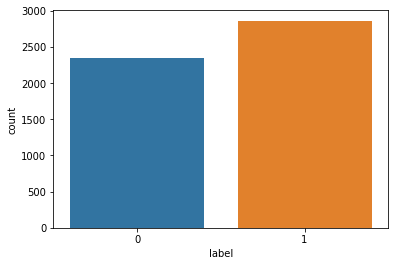

In [67]:
sns.countplot(dataset['label'])

**Pairplot**

<Figure size 1440x576 with 0 Axes>

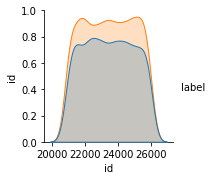

In [60]:
sns.pairplot(dataset, hue = 'label')

**Heatmap**

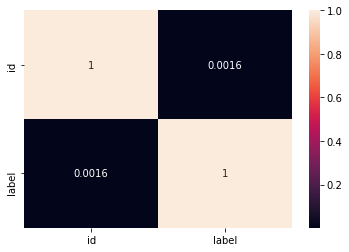

In [61]:
sns.heatmap(dataset.corr(), annot = True)

**Splitting and Scaling of dataset**

In [30]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,].values
Y = dataset.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.25, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Dimensions**

In [35]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",Y_train.shape)
print("Y_test shape : ",Y_test.shape)

X_train shape :  (3900, 2)
X_test shape :  (1300, 2)
Y_train shape :  (3900,)
Y_test shape :  (1300,)


**Using Naive Bayes**

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train , Y_train)
pred_nb = nb.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_nb))
print(classification_report(Y_test, pred_nb))

[[571   0]
 [  0 729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



**Using Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

[[571   0]
 [  0 729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



**Using Logistic Regression** 

In [70]:
from sklearn.linear_model import LogisticRegression

lrr = LogisticRegression(random_state = 45)
lrr.fit(X_train, Y_train)
pred_lrr = lrr.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_lrr))
print(classification_report(Y_test, pred_lrr))

[[571   0]
 [  0 729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



**Using Support Vector Classifier**

In [72]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, pred_svc))
print(classification_report(Y_test, pred_svc))

[[571   0]
 [  0 729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       571
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

